In [1]:
%matplotlib inline

In [2]:
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats  as stats

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/home/veronika/miniconda2/envs/etePyQt4/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
def calc_success(row):
    if 0<= row.Campaign_rate <2:
        return 0
    elif 2<= row.Campaign_rate <=100:
        return 1
    else:
        None

        
#Function for calculating the accuraciesPython

def model_accuracy(trained_model, features, targets):
    """
    Get the accuracy score of the model
    :param trained_model:
    :param features:
    :param targets:
    :return:
    """
    accuracy_score = trained_model.score(features, targets)
    return accuracy_score


def train_logistic_regression(train_x, train_y):
    """
    Training logistic regression model with train dataset features(train_x) and target(train_y)
    :param train_x:
    :param train_y:
    :return:
    """
 
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(train_x, train_y)
    return logistic_regression_model


def dataset_headers(dataset):
    """
    To get the dataset header names
    :param dataset: loaded dataset into pandas DataFrame
    :return: list of header names
    """
    return list(dataset.columns.values)
 
    
def unique_observations(dataset, header, method=1):
    """
    To get unique observations in the loaded pandas DataFrame column
    :param dataset:
    :param header:
    :param method: Method to perform the unique (default method=1 for pandas and method=0 for numpy )
    :return:
    """
    try:
        if method == 0:
            # With Numpy
            observations = np.unique(dataset[[header]])
        elif method == 1:
            # With Pandas
            observations = pd.unique(dataset[header].values.ravel())
        else:
            observations = None
            print ("Wrong method type, Use 1 for pandas and 0 for numpy")
    except Exception as e:
        observations = None
        print ("Error: {error_msg} /n Please check the inputs once..!".format(error_msg=e.message))
    return observations
 
    
def feature_target_frequency_relation(dataset, f_t_headers):
 
    """
    To get the frequency relation between targets and the unique feature observations
    :param dataset:
    :param f_t_headers: feature and target header
    :return: feature unique observations dictionary of frequency count dictionary
    """
 
    feature_unique_observations = unique_observations(dataset, f_t_headers[0])
    unique_targets = unique_observations(dataset, f_t_headers[1])
 
    frequencies = {}
    for feature in feature_unique_observations:
        frequencies[feature] = {unique_targets[0]: len(
            dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[0])]),
            unique_targets[1]: len(
                dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[1])])}
    return frequencies
 
    
def feature_target_histogram(feature_target_frequencies, features_dict, feature_header):
    """
     displaying the data
    :param feature_target_frequencies:
    :param feature_header:
    :return:
    """
    width = 0.35 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    zeroLvls = []
    oneLvls = []
    xTickMarks = []
    ind = []
    
    for un in feature_target_frequencies.keys():
        ind.append(un)
        zeroLvls.append(feature_target_frequencies[un][0.0])
        oneLvls.append(feature_target_frequencies[un][1.0])
        xTickMarks.append(features_dict[un])
    ind = np.array(ind)
        
    rects1 = ax.bar(ind, zeroLvls, width,
                color='black')
    rects2 = ax.bar(ind+width, oneLvls, width,
                color='red')
        
    
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)

    ax.set_xlim(-width,len(ind)+width)
    plt.title('Histogram of {}'.format(feature_header))
    plt.xlabel(feature_header)
    plt.ylabel('Diversity')
    

def feature_target_precent_histogram(feature_target_frequencies, features_dict, feature_header):
    """
     displaying the data
    :param feature_target_frequencies:
    :param feature_header:
    :return:
    """
    width = 0.35 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    precentLvls = []
    xTickMarks = []
    ind = []
    
    for un in feature_target_frequencies.keys():
        ind.append(un)
        precentLvls.append(feature_target_frequencies[un][1.0]/feature_target_frequencies[un][0.0])
        xTickMarks.append(features_dict[un])
    ind = np.array(ind)
        
    rects1 = ax.bar(ind, precentLvls, width,
                color='black')
        
    
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)

    ax.set_xlim(-width,len(ind)+width)
    plt.title('Histogram of {}'.format(feature_header))
    plt.xlabel(feature_header)
    plt.ylabel('Frequency')



Number of Campaigns ::  289023


/home/veronika/miniconda2/envs/etePyQt4/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


47313
train_x size ::  (33119, 4)
train_y size ::  (33119,)
test_x size ::  (14194, 4)
test_y size ::  (14194,)
Train Accuracy:  0.936471511821
Test Accuracy:  0.93271804988


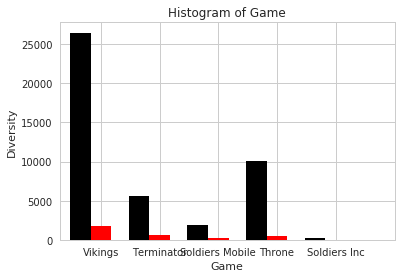

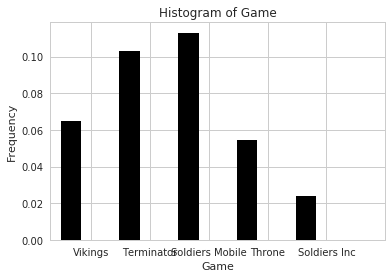

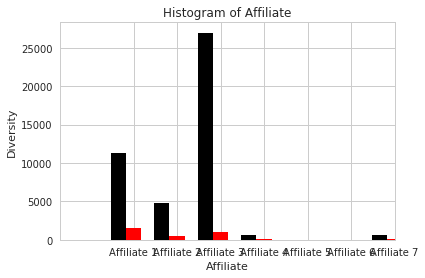

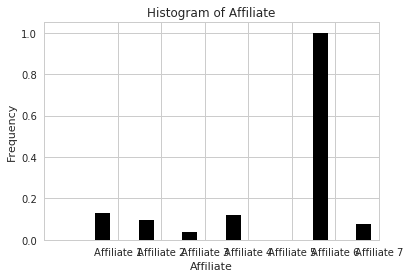

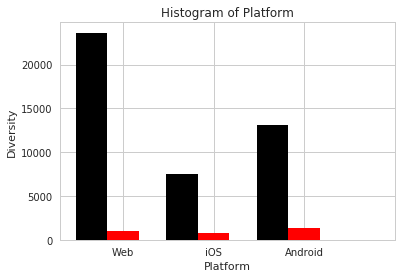

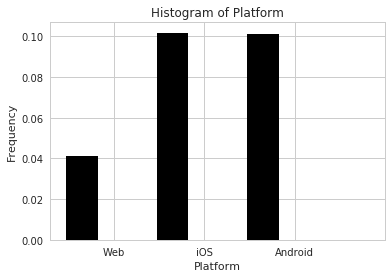

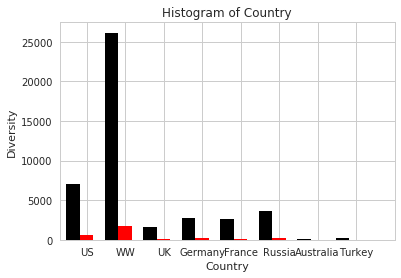

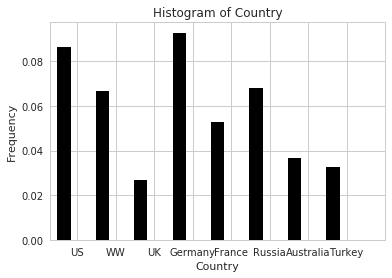

In [7]:
# Load the data set for training and testing the logistic regression classifier
DATA_PATH = "game_data.csv"
ds = pd.read_csv(DATA_PATH)

print ("Number of Campaigns :: ", len(ds))
training_features = ['Game', 'Affiliate', 'Platform', 'Country']

#filter all unrelevent data
ds['Campaign_rate'] = (ds.Depositors/ds.Installs)*100
ds_filter = ds[ds.Campaign_rate.notnull()]

ds_filter['success'] = ds_filter.apply (lambda row: calc_success (row),axis=1)
ds_filter = ds_filter[ds_filter.success.notnull()]

print(len(ds_filter))
target = 'success'

# print("Data set headers: {}".format(ds_filter.columns.values))

features_dict = dict()

for feature in training_features:
#     print('Feature: ', feature)
    if feature == 'Affiliate':
        features_dict['Affiliate'] = dict()
        for un in ds_filter[feature].unique():
            x = int(un.split(' ')[1])
            features_dict['Affiliate'][x] = un
            ds_filter[feature].replace(un, x, inplace=True)
#             print('{}: {}'.format(un, x))
    else:
        features_dict[feature] = dict()
        for x, un in enumerate(ds_filter[feature].unique()):
            ds_filter[feature].replace(un, x, inplace=True)
            features_dict[feature][x] = un
#             print('{}: {}'.format(un, x))
    
# Train , Test data split
train_x, test_x, train_y, test_y = train_test_split(ds_filter[training_features], ds_filter[target], train_size=0.7)

print ("train_x size :: ", train_x.shape)
print ("train_y size :: ", train_y.shape)

print ("test_x size :: ", test_x.shape)
print ("test_y size :: ", test_y.shape)

# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

for feature in training_features:
    feature_target_frequencies = feature_target_frequency_relation(ds_filter, [feature, target])
    feature_target_histogram(feature_target_frequencies, features_dict[feature], feature)
    feature_target_precent_histogram(feature_target_frequencies, features_dict[feature], feature)

train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)

# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)

print ("Train Accuracy: ", train_accuracy)
print ("Test Accuracy: ", test_accuracy)